# TMDB MOVIES

●Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDb)

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


●Some Questions about our data:

1-Movie Name for Each Genres which have the highest Voting Value

2-The most years of issuance of films?

3-What are the top 20 films whose profits did not cover their budget?

4- Number of Movie for each geners









In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Let's Load our Data 

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
print('Numper of rows ',df.shape[0])
print('Numper of columns',df.shape[1])

Numper of rows  10866
Numper of columns 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Data Cleaning 



In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df=df.dropna(subset=['genres'])

In [8]:
#Drop home page column 
df.drop(['homepage'],axis=1,inplace=True)

In [9]:
df.duplicated().sum()

1

In [10]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [11]:
#let's split our column to take the first value 
df.genres=df.genres.str.split("|").str.get(0)
df.production_companies=df.production_companies.str.split('|').str.get(0)


In [12]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df.drop_duplicates(inplace=True)
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
df.duplicated().sum()

0

In [15]:
df.drop(['imdb_id','tagline','overview',],axis=1,inplace=True)


In [16]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [17]:
df.fillna("UNKNOWN")

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action,Cherokee Productions,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [18]:
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
director                  42
keywords                1475
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
df.describe().round(2)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.00,10842.00,1.084200e+04,1.084200e+04,10842.00,10842.00,10842.00,10842.00,1.084200e+04,1.084200e+04
mean,65870.68,0.65,1.465531e+07,3.991138e+07,102.14,217.82,5.97,2001.31,1.758712e+07,5.147797e+07
std,91981.36,1.00,3.093971e+07,1.171179e+08,31.29,576.18,0.93,12.81,3.433437e+07,1.447723e+08
min,5.00,0.00,0.000000e+00,0.000000e+00,0.00,10.00,1.50,1960.00,0.000000e+00,0.000000e+00
25%,10589.25,0.21,0.000000e+00,0.000000e+00,90.00,17.00,5.40,1995.00,0.000000e+00,0.000000e+00
50%,20557.00,0.38,0.000000e+00,0.000000e+00,99.00,38.00,6.00,2006.00,0.000000e+00,0.000000e+00
75%,75186.00,0.72,1.500000e+07,2.414118e+07,111.00,146.00,6.60,2011.00,2.092507e+07,3.387838e+07
max,417859.00,32.99,4.250000e+08,2.781506e+09,900.00,9767.00,9.20,2015.00,4.250000e+08,2.827124e+09


In [20]:
df['genres'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

In [21]:
df['production_companies'].value_counts()

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
                                         ... 
Premise Media Corporation                   1
Fox                                         1
Symposium Productions                       1
Princessa Productions                       1
Norm-Iris                                   1
Name: production_companies, Length: 3053, dtype: int64

In [22]:
#check the budget and revenue =0
df.drop(df[(df.budget==0) & (df.revenue==0)].index,inplace=True)


In [23]:
#drop run time values  =0
df.drop(df[(df.runtime==0)].index,inplace=True)
df.shape

(6160, 17)

In [24]:
#replace 0 values in the badget we the mean of all badget 
df['budget']=df['budget'].replace(0,df['budget'].mean())
#lets go to see what we change 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6160.000000,6160.000000,6.160000e+03,6.160000e+03,6160.000000,6160.000000,6160.000000,6160.000000,6.160000e+03,6.160000e+03
mean,48268.234416,0.909825,2.995862e+07,7.024663e+07,106.511526,356.158279,6.040325,2000.986364,3.095245e+07,9.060458e+07
std,75482.302989,1.241150,3.567706e+07,1.483662e+08,23.039280,733.408520,0.871169,11.913342,4.075861e+07,1.826094e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9289.750000,0.322289,8.000000e+06,1.204650e+05,93.000000,31.000000,5.500000,1994.000000,2.374361e+06,1.205188e+05
50%,13718.500000,0.570599,2.500000e+07,1.659765e+07,103.000000,96.000000,6.100000,2004.000000,1.622504e+07,2.335914e+07
75%,48294.000000,1.050809,3.300000e+07,7.150419e+07,116.000000,324.250000,6.600000,2010.000000,4.206674e+07,9.530786e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


# Exploratory Data Analysis

Q1)What is the highest vote for each movie genre.

1-Group the DataFrame by 'genres' column and find the maximum value of the 'vote_average' column for each group 

In [25]:
df.groupby('genres').apply(lambda x: x.sort_values(by= 'vote_average',ascending=False).head(1).reset_index())

,,index,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,,,,,,,,,,
Action,0,2722,331214,0.537593,2.579247e+07,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,705,Action,HBO,9/9/01,313,8.0,2001,0.000000e+00,1.539360e+08
Adventure,0,7309,1891,5.488441,1.800000e+07,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,rebel|asteroid|space battle|snow storm|space c...,124,Adventure,Lucasfilm,1/1/80,3954,8.0,1980,4.762866e+07,1.424626e+09
Animation,0,8923,32085,0.391453,6.000000e+04,0,Vincent,Vincent Price,Tim Burton,boy|mama's boy|stop motion animation|one word ...,6,Animation,Walt Disney Productions,1/1/82,107,7.9,1982,1.355785e+05,0.000000e+00
Comedy,0,4179,13,6.715966,5.500000e+07,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,vietnam veteran|hippie|mentally disabled|runni...,142,Comedy,Paramount Pictures,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08
Crime,0,3826,414419,0.146477,3.000000e+07,0,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,sword|martial law|revenge|wedding,247,Crime,Miramax Films,3/28/11,28,8.1,2011,2.908194e+07,0.000000e+00
Documentary,0,7948,24128,0.283191,1.200000e+06,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,concert,88,Documentary,Talking Heads,11/16/84,23,8.4,1984,2.518850e+06,1.045097e+07
Drama,0,5986,242575,0.054380,4.000000e+06,0,"Guten Tag, RamÃ³n",Adriana Barraza|RÃ¼diger Evers|Hector Kotsifak...,Jorge RamÃ­rez SuÃ¡rez,germany|mexican,119,Drama,Eficine 226,10/18/13,11,8.4,2013,3.744133e+06,0.000000e+00
Family,0,736,110416,1.376670,2.579247e+07,857522,Song of the Sea,Brendan Gleeson|Fionnula Flanagan|David Rawle|...,Tomm Moore,fairy tale|lighthouse|folk music|lighthouse ke...,93,Family,Irish Film Board,9/6/14,263,8.0,2014,0.000000e+00,7.898558e+05
Fantasy,0,2414,497,2.719461,6.000000e+07,284600000,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,Frank Darabont,southern u.s.|black people|mentally disabled|i...,189,Fantasy,Castle Rock Entertainment,12/10/99,2299,8.0,1999,7.854317e+07,3.725564e+08


# Q2) Top 10 years of film release

>adds a new column 'count_of_movie_per_year' to the df, which shows the number of movies released in each year.

>grouping by release year and count the original title(the name of the film )

In [26]:
df['count_of_movie_per_year']=df.groupby(['release_year'])['original_title'].count()

<Figure size 1000x600 with 0 Axes>

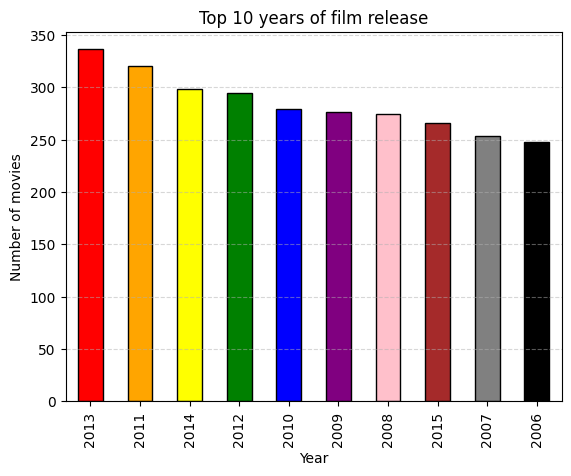

<Figure size 1000x600 with 0 Axes>

In [27]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black']

df['count_of_movie_per_year'].sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 years of film release', color=colors
                                                                        ,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.figure(figsize=(10, 6))

#True: sets the grid to be visible.
#axis='y': sets the grid to be drawn only on the y-axis (vertical).
#10: sets the width of the figure to be 10 inches.
#6: sets the height of the figure to be 6 inches.


# Q3) What are the top 20 films whose profits did not cover their budget?

In [29]:
# Calculate the profit for each movie by subtracting the budget from the revenue
df['profit']=df['revenue']-df['budget']

# Filter the dataframe to only include movies with a negative profit
losing_movies=df[df['profit']<0]

# Sort the losing_movies dataframe by the profit in ascending order and select the top 20
top_20_losing_movies=losing_movies.sort_values(by='profit').head(20)

In [36]:
top_20_losing_movies[['original_title','genres','profit']]

,original_title,genres,profit
2244,The Warrior's Way,Adventure,-413912431.0
5508,The Lone Ranger,Action,-165710090.0
2069,The Wolfman,Horror,-150000000.0
2214,The Pacific,War,-120000000.0
7031,The Alamo,Western,-119180039.0
3484,Mars Needs Moms,Adventure,-111007242.0
2190,Double Wedding,Comedy,-104002432.0
1696,Dragonball Evolution,Action,-100000000.0
4970,Brother Bear,Animation,-99999750.0
2435,The 13th Warrior,Adventure,-98301101.0


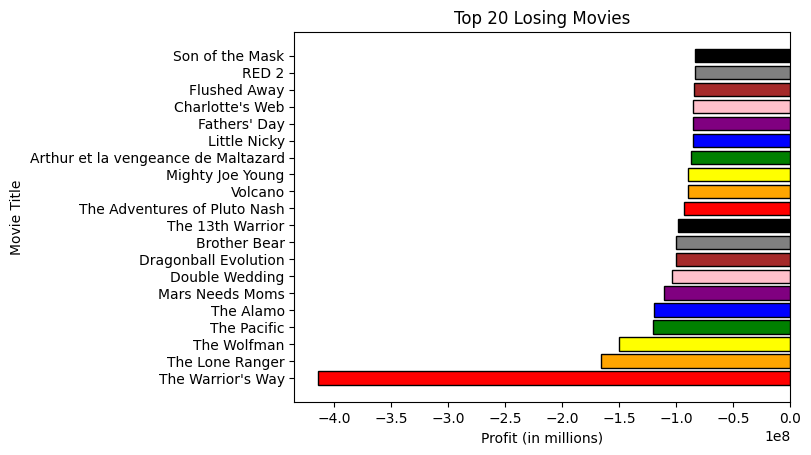

In [53]:
plt.barh(top_20_losing_movies['original_title'], top_20_losing_movies['profit'], height=0.8,color=colors,edgecolor='black')
plt.xlabel('Profit (in millions)')
plt.ylabel('Movie Title')
plt.title('Top 20 Losing Movies')
plt.show()

# Q4) Number of Movie for each geners

Text(0, 0.5, 'Number Of Movies')

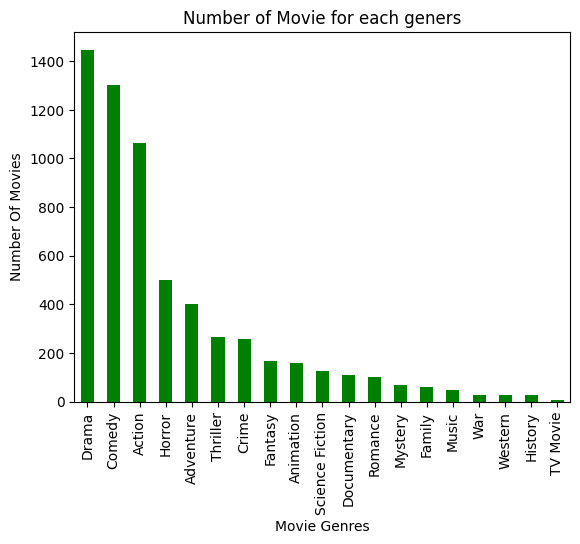

In [67]:
df["genres"].value_counts(ascending=False).plot(kind='bar',title='Number of Movie for each geners',color='green')
plt.xlabel('Movie Genres')
plt.ylabel("Number Of Movies")

### Conclusions

We will find that on the genre of movies is drama followed by comedy

Although action films occupy the third place in terms of the number of films, they occupy the second place in unsuccessful films, as the Revenue from them did not cover the budget.


Based on the data, it appears that the average vote does not have a clear impact on a film's success. This is because when we look at the top 20 least successful films, we find that they have a high average vote. This leads us to question the accuracy of the data and re-evaluate the relationship between average vote and a film's success